In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from Scripts.DataManager.GraphConstructor.TagsGraphConstructor import TagsGraphConstructor

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
from Scripts.Configs.ConfigClass import Config
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence\Scripts\Configs\Config.json')
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx

In [2]:
train_df = pd.read_csv(r'C:\Users\fardin\Projects\ColorIntelligence\data\Amazon-Review\train_sm.csv')
test_df = pd.read_csv(r'C:\Users\fardin\Projects\ColorIntelligence\data\Amazon-Review\test_sm.csv')

In [3]:
train_df.columns = ['Polarity', 'Title', 'Review']
test_df.columns = ['Polarity', 'Title', 'Review']

In [4]:
train_df = train_df[['Polarity', 'Review']]
test_df = test_df[['Polarity', 'Review']]

In [5]:
graph_const = TagsGraphConstructor(train_df['Review'][0], config)

In [6]:
print(graph_const.graph)
print(graph_const.node_attr)
print(graph_const.edge_index)
print(graph_const.edge_attr)

Data(x=[154, 300], edge_index=[2, 208], edge_attr=[208])
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-1.3229, -0.9106, -0.1730,  ..., -0.5912, -0.5681, -0.8500],
        [-0.0765, -4.6896, -4.0431,  ...,  1.3040, -0.5270, -1.3622],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
tensor([[ 49,  49,  50,  50,  51,  51,  52,  52,  53,  53,  54,  54,  55,  55,
          56,  56,  57,  57,  58,  58,  59,  59,  60,  60,  61,  61,  62,  62,
          63,  63,  64,  64,  65,  65,  66,  66,  67,  67,  68,  68,  69,  69,
          70,  70,  71,  71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,
          77,  77,  78,  78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,
          84,  84,  85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  90,  90,
          91,  91,  92,  92,  93,  

{(49, 28): {'dep': 1}, (49, 1): {'dep': 2}, (50, 41): {'dep': 1}, (50, 2): {'dep': 2}, (51, 39): {'dep': 1}, (51, 3): {'dep': 2}, (52, 11): {'dep': 1}, (52, 4): {'dep': 2}, (53, 22): {'dep': 1}, (53, 5): {'dep': 2}, (54, 15): {'dep': 1}, (54, 6): {'dep': 2}, (55, 25): {'dep': 1}, (55, 7): {'dep': 2}, (56, 39): {'dep': 1}, (56, 8): {'dep': 2}, (57, 15): {'dep': 1}, (57, 9): {'dep': 2}, (58, 11): {'dep': 1}, (58, 10): {'dep': 2}, (59, 42): {'dep': 1}, (59, 11): {'dep': 2}, (60, 11): {'dep': 1}, (60, 12): {'dep': 2}, (61, 18): {'dep': 1}, (61, 13): {'dep': 2}, (62, 49): {'dep': 1}, (62, 14): {'dep': 2}, (63, 22): {'dep': 1}, (63, 15): {'dep': 2}, (64, 22): {'dep': 1}, (64, 16): {'dep': 2}, (65, 1): {'dep': 1}, (65, 17): {'dep': 2}, (66, 9): {'dep': 1}, (66, 18): {'dep': 2}, (67, 28): {'dep': 1}, (67, 19): {'dep': 2}, (68, 38): {'dep': 1}, (68, 20): {'dep': 2}, (69, 15): {'dep': 1}, (69, 21): {'dep': 2}, (70, 28): {'dep': 1}, (70, 22): {'dep': 2}, (71, 20): {'dep': 1}, (71, 23): {'dep': 2}

{0: Text(-0.6917306447331942, -0.7158391772053391, '$'),
 1: Text(-0.8865594354294509, -0.4408647779745265, "''"),
 2: Text(0.7146439580170434, 0.4932148015064492, ','),
 3: Text(0.9612477948503296, 0.21879338167868664, '-LRB-'),
 4: Text(-0.9172180766897553, -0.19850097771118566, '-RRB-'),
 5: Text(-0.9353799817744446, -0.3094637651439307, '.'),
 6: Text(-0.9705669964955028, 0.2653988862102755, ':'),
 7: Text(0.8446341954372594, -0.5492636947924902, 'ADD'),
 8: Text(-0.7419771386407479, -0.4211375840271753, 'AFX'),
 9: Text(-0.473251160227228, -0.9084877618789522, 'CC'),
 10: Text(-0.2472834491991733, -0.9346555366118177, 'CD'),
 11: Text(0.8720226279459867, 0.4751658898312682, 'DT'),
 12: Text(-0.8190359330539014, -0.4709190181109256, 'EX'),
 13: Text(-0.49804911646045175, -0.8273410383078653, 'FW'),
 14: Text(0.9275835944237436, 0.35573754837353433, 'HYPH'),
 15: Text(0.9810128479067809, -0.05453091015281966, 'IN'),
 16: Text(0.1969332117130651, -0.926768546469789, 'JJ'),
 17: Text(

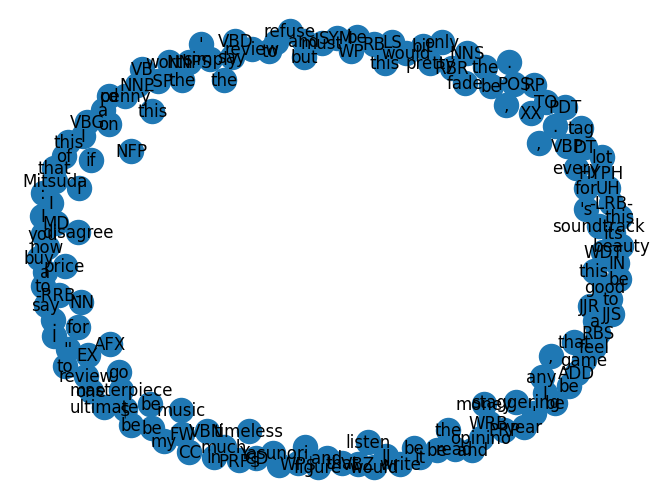

In [7]:
g = to_networkx(graph_const.graph , to_undirected=True)
layout = nx.spring_layout(g)
nx.draw(g, pos=layout)
words_dict = {i: graph_const.node_tokens[i] for i in range(len(graph_const.node_tokens))}
edge_labels_dict = {(graph_const.edge_index[0][i].item() , graph_const.edge_index[1][i].item()) : { "dep" : graph_const.edge_attr[i]} for i in range(len(graph_const.edge_attr))}
print(edge_labels_dict)
nx.set_edge_attributes(g , edge_labels_dict)
nx.draw_networkx_labels(g, pos=layout, labels=words_dict)
# nx.draw_networkx_edge_labels(g, pos=layout)